In [1]:
import numpy as np
import xarray as xr
import sys
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_tools/lkf_tools/')
from dataset import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import cmocean

In [5]:
path = '/p/project/chhb19/gaertner2/data/awicm_cvmix/'
path_nc = '/p/scratch/chhb19/gaertner2/interpolated_fesom_output/1km/'
path_ds = path + 'datasets/'
path_imgs = path + 'imgs/'

In [6]:
year = 2017

In [7]:
file = xr.open_dataset(path_nc + f'1km_{year}.nc')
line = ( (((file.ULON > -120) & (file.ULON < 100)) & (file.ULAT >= 79.9) & (file.ULAT <= 80))
        | (((file.ULON > -120.5) & (file.ULON <= -120)) & (file.ULAT >= 70) & (file.ULAT < 80))
        | (((file.ULON < 100.5) & (file.ULON >= 100)) & (file.ULAT >= 70) & (file.ULAT < 80))
        | ((file.ULON <= -120) & (file.ULAT >= 69.9) & (file.ULAT <= 70)  )
        | ((file.ULON >= 100) & (file.ULAT >= 69.9) & (file.ULAT <= 70))
       )
line = np.where(line==1,1,np.nan)

lkf_data = np.load(path_ds + f'ds_{year}.npy', allow_pickle=True)[0]

z = 70
# arctic basin
a = max([0,lkf_data.index_y[0][0]-1])
b = lkf_data.index_y[0][-1]+2
c = max([0,lkf_data.index_x[0][0]-1])
d = lkf_data.index_x[0][-1]+2 - z
e = lkf_data.red_fac

lon = lkf_data.lon[a:b:e,c:d:e]
lat = lkf_data.lat[a:b:e,c:d:e]

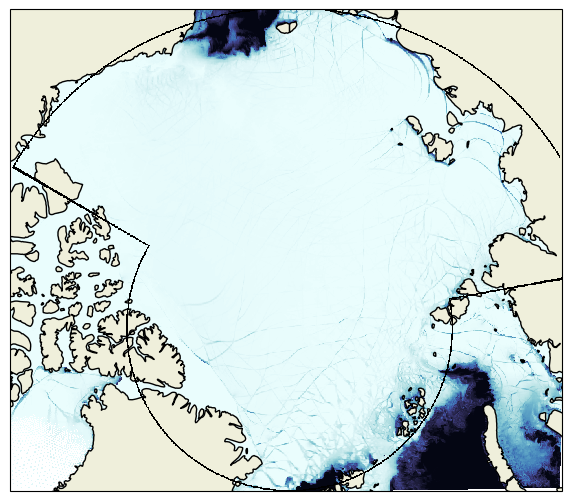

In [12]:
i = 0

fig = plt.figure(figsize=[6, 6])

ax = plt.subplot(111, projection=ccrs.Orthographic(0, 90))
ax.add_feature(cfeature.LAND, zorder=2, edgecolor='black')
im = ax.pcolormesh(lon, lat, file.A.isel(time=i)[a:b,c:d],
                   cmap = cmocean.cm.ice, vmin=0, vmax=1,
                   transform=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, line[a:b,c:d],
              transform = ccrs.PlateCarree(),
              cmap = 'Greys', vmin=-1, vmax=0,
             zorder=3)

day = str(i+1)
day.rjust(3 + len(day), '0')
res = datetime.strptime(f'{year}-{day}', "%Y-%j").strftime("%m-%d-%Y")
#ax.text(0.01, 0.98, f'{res}', transform=ax.transAxes, fontsize=20,
#    verticalalignment='top')

#ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

#plt.colorbar(im, label='sea ice concentration', fraction=0.1, pad=0.02, orientation='horizontal')

fig.tight_layout()
#plt.savefig(path_imgs + 'arctic_basin_region.png', dpi=200, bbox_inches='tight')

In [13]:
def plot(i):
    fig = plt.figure(figsize=[8, 8])
    ax = plt.subplot(111, projection=ccrs.Orthographic(0, 90))

    ax.add_feature(cfeature.LAND, zorder=2, edgecolor='black')
    #ax.add_feature(cartopy.feature.NaturalEarthFeature)
    ax.pcolormesh(lon, lat, np.zeros_like(lon), transform = ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=1)
    pcm = ax.pcolormesh(lon, lat, lkf_data.calc_eps(i)[0][:,:-z],
                        transform = ccrs.PlateCarree(),
                        cmap='viridis', vmin=0, vmax=2)
    ax.pcolormesh(lon, lat, line[a:b,c:d],
                  transform = ccrs.PlateCarree(),
                  cmap = 'Greys', vmin=-1, vmax=0)

    lkfs = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(i+1))),allow_pickle=True)

    for ilkf in lkfs:
        if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
            ilkf[ilkf[:,2]<0,2]+=360
        ax.plot(ilkf[:,2],ilkf[:,3],transform=ccrs.PlateCarree())

    day = str(lkf_data.indexes[i]+1)
    day.rjust(3 + len(day), '0')
    res = datetime.strptime(f'{year}-{day}', "%Y-%j").strftime("%m-%d-%Y")

    ax.text(0.03, 0.97, f'{res}', transform=ax.transAxes, fontsize=20,
        verticalalignment='top')

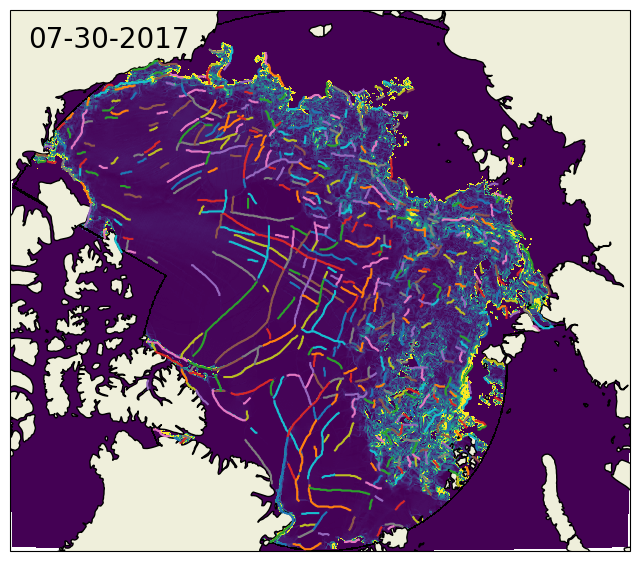

In [14]:
plot(210)

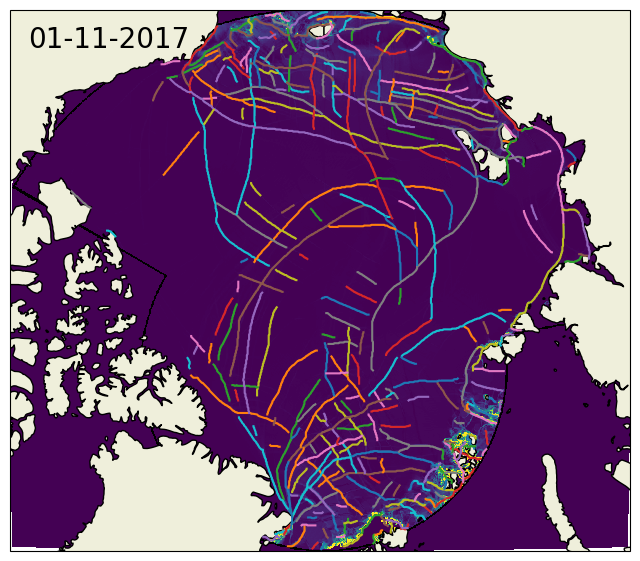

In [15]:
plot(10)

In [20]:
LKFs = np.load(path + 'LKFs.npy', allow_pickle=True)[0]

In [23]:
i = 3

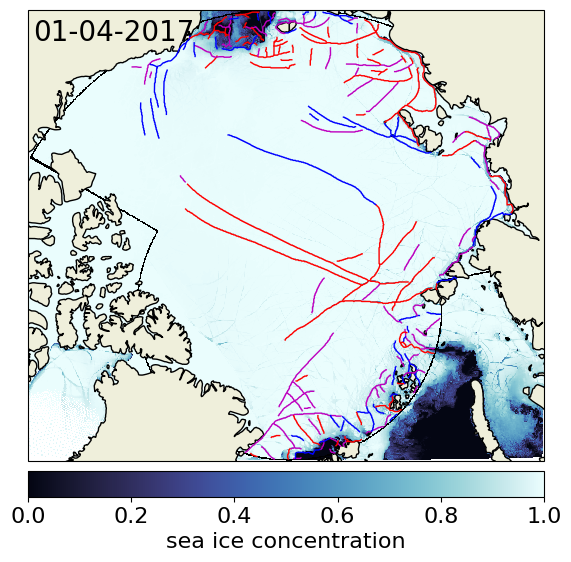

In [24]:
fig = plt.figure(figsize=[6, 6])

ax = plt.subplot(111, projection=ccrs.Orthographic(0, 90))
ax.add_feature(cfeature.LAND, zorder=2, edgecolor='black')
im = ax.pcolormesh(lon, lat, file.A.isel(time=i)[a:b,c:d],
                   cmap = cmocean.cm.ice, vmin=0, vmax=1,
                   transform=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, line[a:b,c:d],
              transform = ccrs.PlateCarree(),
              cmap = 'Greys', vmin=-1, vmax=0)

lkfs = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(i+1))),allow_pickle=True)

for ind_lkf, lkf in enumerate(lkfs):
    if np.min(lkf[:,2])<-150 and np.max(lkf[:,2]>150):
        lkf[lkf[:,2]<0,2]+=360
        
    if LKFs[f'y{year}'][f'd{i}']['lead or ridge'][ind_lkf]==1: color='b'
    if LKFs[f'y{year}'][f'd{i}']['lead or ridge'][ind_lkf]==2: color='r'
    if LKFs[f'y{year}'][f'd{i}']['lead or ridge'][ind_lkf]==3: color='m'
    
    ax.plot(lkf[:,2],lkf[:,3],transform=ccrs.PlateCarree(),
            linewidth=1, color=color)

day = str(i+1)
day.rjust(3 + len(day), '0')
res = datetime.strptime(f'{year}-{day}', "%Y-%j").strftime("%m-%d-%Y")
ax.text(0.01, 0.98, f'{res}', transform=ax.transAxes, fontsize=20,
    verticalalignment='top')

#ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

plt.colorbar(im, label='sea ice concentration', fraction=0.1, pad=0.02, orientation='horizontal')

fig.tight_layout()

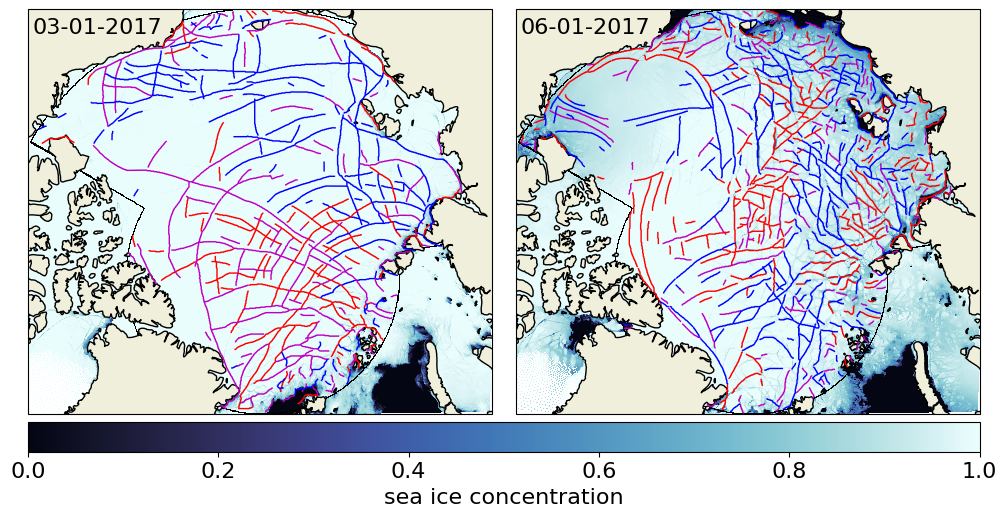

In [30]:
fig = plt.figure(figsize=[10, 6])
axs = [fig.add_subplot(1,2,col, projection=ccrs.Orthographic(0, 90)) for col in [1,2]]

for ax, i, name in zip(axs, [59,151], ['060','152']):

    ax.add_feature(cfeature.LAND, zorder=2, edgecolor='black')
    im = ax.pcolormesh(file.ULON[a:b,c:d], file.ULAT[a:b,c:d],
                    file.A.isel(time=i)[a:b,c:d],
                    cmap = cmocean.cm.ice, vmin=0, vmax=1,
                    transform=ccrs.PlateCarree())
    ax.pcolormesh(lon, lat, line[a:b,c:d],
                  transform = ccrs.PlateCarree(),
                  cmap = 'Greys', vmin=-1, vmax=0)

    lkfs = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(i+1))),allow_pickle=True)

    for ind_lkf, lkf in enumerate(lkfs):
        if np.min(lkf[:,2])<-150 and np.max(lkf[:,2]>150):
            lkf[lkf[:,2]<0,2]+=360

        if LKFs[f'y{year}'][f'd{i}']['lead or ridge'][ind_lkf]==1: color='b'
        if LKFs[f'y{year}'][f'd{i}']['lead or ridge'][ind_lkf]==2: color='r'
        if LKFs[f'y{year}'][f'd{i}']['lead or ridge'][ind_lkf]==3: color='m'

        ax.plot(lkf[:,2],lkf[:,3],transform=ccrs.PlateCarree(),
                linewidth=1, color=color)

    day = str(i+1)
    day.rjust(3 + len(day), '0')
    res = datetime.strptime(f'{year}-{day}', "%Y-%j").strftime("%m-%d-%Y")
    ax.text(0.01, 0.98, f'{res}', transform=ax.transAxes, fontsize=16,
        verticalalignment='top')



fig.tight_layout()

p0 = axs[0].get_position().get_points().flatten()
p1 = axs[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.1, p1[2]-p0[0], 0.05])
plt.colorbar(im, label='sea ice concentration', cax=ax_cbar, orientation='horizontal')